# Homework #2

### 연습문제 4.7 1번) 모바일 폰이나 카메라에 저장한 사진 중 빨간색, 파란색, 초록색 물건을 찍은 사진 몇장을 준비해보자.

In [2]:
#이미지를 가져오기 위한 라이브러리 준비
from PIL import Image
import matplotlib.pyplot as plt
#이미지를 tensor로 바꾸기 위한 라이브러리 준비
import numpy as np
import torch

#### 1-a. 각 이미지를 읽어 텐서로 변환하라.

In [3]:
#red image, blue image, green image 가져오기
red_image = Image.open('./red_image.jpg')
blue_image =  Image.open('./blue_image.jpg')
green_image = Image.open('./green_image.jpg')

Red image size :  340  x  510  x  3


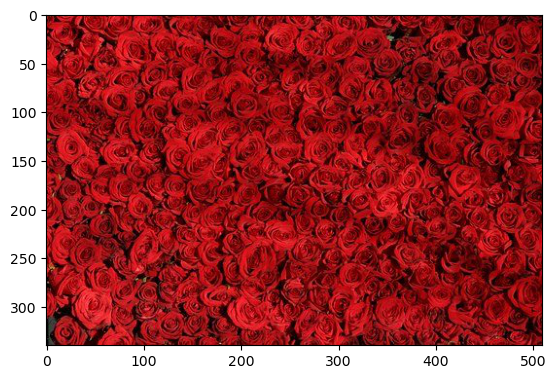

In [4]:
#red_image 확인
plt.imshow(red_image)
width, height = red_image.size
mode = red_image.mode
if mode =="RGB":
    num_channels = 3
else:
    print("채널 수를 다시 확인하세요.")
print("Red image size : ", height, " x ", width, " x ", num_channels)

Blue image size :  636  x  1200  x  3


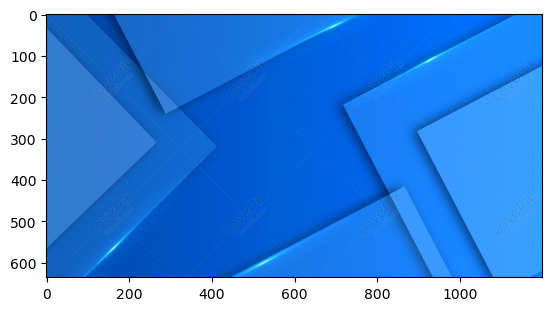

In [5]:
#red_image 확인
plt.imshow(blue_image)
width, height = blue_image.size
mode = blue_image.mode
if mode =="RGB":
    num_channels = 3
else:
    print("채널 수를 다시 확인하세요.")
print("Blue image size : ", height, " x ", width, " x ", num_channels)

Grenn Image size :  155  x  326  x  3


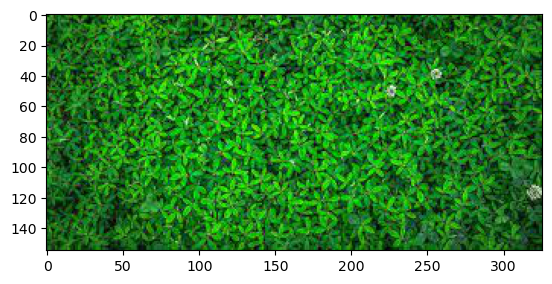

In [6]:
#red_image 확인
plt.imshow(green_image)
width, height = green_image.size
mode = green_image.mode
if mode =="RGB":
    num_channels = 3
print("Grenn Image size : ", height, " x ", width, " x ", num_channels)

In [7]:
# 각 이미지를 numpy로 변환
red_image_numpy = np.array(red_image)
blue_image_numpy = np.array(blue_image)
green_image_numpy = np.array(green_image)

In [8]:
# 각 이미지에 대한 numpy to tensor
red_image_tensor = torch.from_numpy(red_image_numpy).float()
blue_image_tensor = torch.from_numpy(blue_image_numpy).float()
green_image_tensor = torch.from_numpy(green_image_numpy).float()


In [9]:
#예시로 red image tensor size 확인
red_image_tensor.size()

torch.Size([340, 510, 3])

In [10]:
# tensor size : H x W x C -> C x H x W
# 이번 문제에서는 불필요하지만 추후 학습을 시킬 때 보통 pytorch에서는 tensor size를 CxHxW로 하기 때문에 다음과 같이 변경
red_image_tensor = red_image_tensor.permute(2, 0, 1)
blue_image_tensor = blue_image_tensor.permute(2, 0, 1)
green_image_tensor = green_image_tensor.permute(2, 0, 1)

In [11]:
#예시로 red image tensor size 확인
red_image_tensor
red_image_tensor.size()

torch.Size([3, 340, 510])

#### 1-b. 각 이미지 텐서에 대해 .mean() 메소드를 사용해 이미지가 얼마나 밝은지 확인해라.

In [12]:
# 각 이미지 텐서에 대해 평균값 확인
red_image_mean = torch.mean(red_image_tensor)
blue_image_mean = torch.mean(blue_image_tensor)
green_image_mean = torch.mean(green_image_tensor)

In [13]:
#각 이미지에 대한 평균값 출력
print("빨간색 이미지의 평균값 : ", red_image_mean,
      "파란색 이미지의 평균값 : ", blue_image_mean,
       "초록색 이미지의 평균값 : ", green_image_mean)

빨간색 이미지의 평균값 :  tensor(59.4463) 파란색 이미지의 평균값 :  tensor(119.6180) 초록색 이미지의 평균값 :  tensor(60.7925)


#### 1-c. 이미지의 각 채널 평균을 구해보라. 채널 평균값만으로 빨간색, 파란색, 초록색 물건을 구별할 수 있는가?

In [14]:
#이미지에 대한 RGB 각 채널의 평균값을 출력하는 함수 정의
def rgb_mean(image_tensor):
    r_mean = image_tensor[0, :, :].mean()
    g_mean = image_tensor[1, :, :].mean()
    b_mean = image_tensor[2, :, :].mean()

    print("Red channel mean: ", r_mean)
    print("Green channel mean: ", g_mean)
    print("Blue channel mean: ", b_mean)

In [15]:
#빨간색 이미지 rgb 평균값
rgb_mean(red_image_tensor)

Red channel mean:  tensor(140.4574)
Green channel mean:  tensor(17.2676)
Blue channel mean:  tensor(20.6138)


In [16]:
#파란색 이미지 rgb 평균값
rgb_mean(blue_image_tensor)

Red channel mean:  tensor(22.6275)
Green channel mean:  tensor(114.3701)
Blue channel mean:  tensor(221.8563)


In [17]:
#초록색 이미지 rgb 평균값
rgb_mean(green_image_tensor)

Red channel mean:  tensor(31.9820)
Green channel mean:  tensor(121.5656)
Blue channel mean:  tensor(28.8299)


* (b) 이미지가 얼마나 밝은지 확인하기 위해 각각의 이미지에 대해 평균값을 구했다. 평균값이 높다는 것은 전체적인 이미지가 하얀색 에 가깝다는 뜻이므로 값이 높을수록 밝은 이미지이며, 낮을수록 어두운 이미지이다. 시각적으로 이미지를 봤을 때에 초록색 이미지나 빨간색 이미지에 비해 파란색 이미지가 더욱 밝다고 느껴졌다. 절대적인 기준에서 어떤 이미지가 얼마만큼 밝다라는 것은 알 수 없지만 상대적으로 파란색 이미지가 가장 밝다는 것을 알 수 있다.
* (c) 결과를 보면 각 채널의 평균값만으로도 충분히 어떤 색의 물건인지 확인할 수 있다. 하지만 본 과제에서 사용한 이미지는 극단적으로 빨간색, 초록색, 파란색으로 이루어진 이미지였다. 만약, 배경에 하얀색 물체가 있거나 인식하고자 하는 물체의 크기가 작을 경우 이미지의 채널의 평균값만으로는 구별을 할 수 없을 수도 있다.

### 연습문제 5.7 1번) 모델을 w2 * t_u ** 2 + w1 + t_u + b로 다시 정의하자

In [2]:
#문제 해결을 위해 라이브러리 import
import numpy as np
import torch
import torch.optim as optim

In [3]:
#데이터 입력과 tensor로 바꾸기
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
#가중치에 대한 기울기를 비슷한 수준으로 맞추어 파라미터 업데이트를 안정적으로 하기 위해 입력갑 정규화
t_un = t_u*0.1

In [4]:
#데이터를 학습 데이터셋과 검증 데이터셋으로 나누는 함수 정의
def split_dataset(t_u, t_c):
    n_samples = t_u.shape[0]
    n_val = int(0.2 * n_samples)

    shuffled_indices = torch.randperm(n_samples)

    train_indices = shuffled_indices[:-n_val]
    val_indices = shuffled_indices[-n_val:]

    train_t_u = t_u[train_indices]
    train_t_c = t_c[train_indices]

    val_t_u = t_u[val_indices]
    val_t_c = t_c[val_indices]

    return train_t_u, train_t_c, val_t_u, val_t_c

In [5]:
#문제의 요구에 맞춰 model 함수 정의
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [6]:
#Loss function 정의 : 모델 변경과 무관한 부분
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [7]:
#training loop 정의
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
            
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print("Epoch", epoch, "Training loss", train_loss.item(),
                  " Validation loss", val_loss.item())
    
    return params        

In [8]:
#데이터셋 나누기
train_t_un, train_t_c, val_t_un, val_t_c = split_dataset(t_un, t_c)

In [16]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

#연습문제 6.5를 해결하기 위해 추가로 학습 time 측정
import time
start_time = time.time()

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

end_time = time.time()

elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time)

Epoch 1 Training loss 700.8782348632812  Validation loss 562.9166259765625
Epoch 2 Training loss 400.5066223144531  Validation loss 339.80120849609375
Epoch 3 Training loss 231.73190307617188  Validation loss 209.3004150390625
Epoch 500 Training loss 11.917912483215332  Validation loss 4.795485496520996
Epoch 1000 Training loss 9.562285423278809  Validation loss 3.3341073989868164
Epoch 1500 Training loss 7.931550979614258  Validation loss 2.332193613052368
Epoch 2000 Training loss 6.802082538604736  Validation loss 1.646421194076538
Epoch 2500 Training loss 6.019246578216553  Validation loss 1.1779758930206299
Epoch 3000 Training loss 5.4761128425598145  Validation loss 0.8587632179260254
Elapsed time: 1.3460800647735596


* (a): 이 문제를 해결하기 위해서는 훈련 루프 함수 자체에 대해 변경할 부분이 없지만, 인자로 들어가는 params 변수에 대해 w1, w2, b가 들어가야 하므로 총 3개의 값이 필요하다. 따라서, params를 torch.tensor([1.0, 1.0, 0.0], requires_grad=True)로 정의했다.
* (b): 모델 변경과 관련이 없는 부분은 데이터를 나누는 함수와 Loss function을 정의하는 함수 등이 있다.
* (c): 훈련 후에 손실은 학습 데이터셋과 검증 데이터셋에 대해 모두 감소하는 것으로 나타난다.
* (d): 이전 모델과 비교를 했을 때 학습 데이터셋에 대한 오차와 검증 데이터셋에 대한 오차가 모두 감소한 것으로 나타났다. 결과를 보면 학습 데이터셋에 비해 검증 데이터셋에 대한 오차가 매우 적은 것을 알 수 있다. 이는 데이터셋의 부족, 과도한 훈련으로 인한 과적합이 발생하여 나타나는 현상이라고 생각한다. 그 이유에 대해 생각해보면, 모델은 더 복잡해졌지만, 학습에 사용되는 데이터셋의 크기는 동일하며, 특히 검증 데이터셋은 매우 적은 데이터셋이기 때문에 과적합이 발생했음을 알 수 있다. 이를 해결하기 위해 데이터셋을 늘리기, 데이터셋을 나눌 때 적적하게 나누기, 학습 반복 횟수 줄이기, 모델 단순화하기 등과 같은 방법이 있다.

### 연습문제 6.5 2번 4장의 와인 데이터를 읽어서 적당한 수의 입력 파라미터를 가지는 모델을 만들어라

In [26]:
#과제 진행을 위한 라이브러르 import
import numpy as np
import torch
import time
import random

In [27]:
#학습을 위한 wine 데이터 가져오기
wine_path = "../data/p1ch4/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";",
                         skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [28]:
#numpy to torch 
wineq = torch.from_numpy(wineq_numpy)
#wine data 확인
wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [29]:
#학습에 활용할 데이터셋
data = wineq[:, :-1]

data, data.shape

(tensor([[ 7.0000,  0.2700,  0.3600,  ...,  3.0000,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  0.3400,  ...,  3.3000,  0.4900,  9.5000],
         [ 8.1000,  0.2800,  0.4000,  ...,  3.2600,  0.4400, 10.1000],
         ...,
         [ 6.5000,  0.2400,  0.1900,  ...,  2.9900,  0.4600,  9.4000],
         [ 5.5000,  0.2900,  0.3000,  ...,  3.3400,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  0.3800,  ...,  3.2600,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [30]:
#5장에서 배운 것을 기반으로 데이터의 범위가 차이가 너무 크면 학습이 잘 안될 가능성이 있다. 따라서, z-score normalization을 진행한다.
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  2.1326e-01,  ..., -1.2468e+00,
         -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  4.7996e-02,  ...,  7.3995e-01,
          1.3422e-03, -8.2419e-01],
        [ 1.4756e+00,  1.7450e-02,  5.4378e-01,  ...,  4.7505e-01,
         -4.3677e-01, -3.3663e-01],
        ...,
        [-4.2043e-01, -3.7940e-01, -1.1915e+00,  ..., -1.3130e+00,
         -2.6153e-01, -9.0545e-01],
        [-1.6054e+00,  1.1666e-01, -2.8253e-01,  ...,  1.0049e+00,
         -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  3.7852e-01,  ...,  4.7505e-01,
         -1.4882e+00,  1.0448e+00]])

In [31]:
#학습에 정답으로 사용될 데이터
target = wineq[:, -1]
target, target.shape

(tensor([6., 6., 6.,  ..., 6., 7., 6.]), torch.Size([4898]))

In [32]:
#학습을 위해 1번 축에 여분의 차원 추가
target_unsqueezed = target.unsqueeze(1)
target = target_unsqueezed
target.size()

torch.Size([4898, 1])

In [33]:
#5장에서 배운대로 데이터를 학습 데이터셋과 검증 데이터셋으로 나누는 함수 정의
def split_dataset(data, target):
    n_samples = data.shape[0]
    n_val = int(0.2 * n_samples)

    shuffled_indices = torch.randperm(n_samples)

    train_indices = shuffled_indices[:-n_val]
    val_indices = shuffled_indices[-n_val:]

    train_data = data[train_indices]
    train_target = target[train_indices]

    val_data = data[val_indices]
    val_target = target[val_indices]

    return train_data, train_target, val_data, val_target

In [34]:
#데이터 나누기
train_data, train_target, val_data, val_target = split_dataset(data_normalized, target)

In [35]:
#예시로 train data 확인
train_data.shape

torch.Size([3919, 11])

In [36]:
#모델 정의
import torch.nn as nn
import torch.optim as optim
class WineModel(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden_linear1 = nn.Linear(11, 32)
        self.hidden_linear2 = nn.Linear(32, 16)
        self.output_linear = nn.Linear(16, 1)
        self.hidden_activation = nn.Tanh()
        
    def forward(self, input):
        x = self.hidden_linear1(input)
        x = self.hidden_activation(x)
        x = self.hidden_linear2(x)
        x = self.hidden_activation(x)
        output_t = self.output_linear(x)
        return output_t
    
#모델 확인
wine_model = WineModel()
wine_model

WineModel(
  (hidden_linear1): Linear(in_features=11, out_features=32, bias=True)
  (hidden_linear2): Linear(in_features=32, out_features=16, bias=True)
  (output_linear): Linear(in_features=16, out_features=1, bias=True)
  (hidden_activation): Tanh()
)

In [37]:
#학습 루프 정의

def training_loop(n_epochs, optimizer, model, loss_fn, train_data, val_data,
                  train_target, val_target):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(train_data) 
        train_loss = loss_fn(t_p_train, train_target)
        
        with torch.no_grad():
            t_p_val = model(val_data)
            val_loss = loss_fn(t_p_val, val_target)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print("Epoch", epoch, "Training loss", train_loss.item(),
                  " Validation loss", val_loss.item()) 

#### 2-a) 앞에서 다룬 온도 데이터와 비교할 때 훈련 시간이 얼마나 더 오래 걸리는가?
#### 2-c) 데이터셋으로 훈련시키는 동안 손실이 줄어들었는가?

In [38]:
optimizer = optim.SGD(wine_model.parameters(), lr=1e-4) 

start_time = time.time()

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = wine_model,
    loss_fn = nn.MSELoss(),
    train_data = train_data,
    val_data = val_data, 
    train_target = train_target,
    val_target = val_target)

end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time:", elapsed_time)

Epoch 1 Training loss 35.697669982910156  Validation loss 35.745994567871094
Epoch 2 Training loss 35.67340087890625  Validation loss 35.72177505493164
Epoch 3 Training loss 35.6491584777832  Validation loss 35.69758605957031
Epoch 500 Training loss 25.0880126953125  Validation loss 25.158964157104492
Epoch 1000 Training loss 14.807488441467285  Validation loss 14.887100219726562
Epoch 1500 Training loss 6.597537517547607  Validation loss 6.6594557762146
Epoch 2000 Training loss 2.536663055419922  Validation loss 2.5774905681610107
Epoch 2500 Training loss 1.1699750423431396  Validation loss 1.1991125345230103
Epoch 3000 Training loss 0.7948408126831055  Validation loss 0.8191673159599304
Elapsed time: 4.3154613971710205


#### 2-d) 데이터셋을 어떻게 그래프로 표현할 것인가?

In [39]:
# 4장에서 와인 데이터에서 단순하게 임계값으로 좋은 와인인지 나쁜 와인인지 구분한 카테고리가 sulfur(이산화황)이기 때문에 본 문제에 대해서도 sulfur에 대한 와인의 품질을 예측값과 정답값을 비교하고자 한다.
# 모든 데이터를 가져오면 시각화가 직관적으로 이루어지지 않기 때문에 10개만 랜덤하게 가져온다.
n_samples = 10
random_indices = random.sample(range(len(val_data[:,6])), n_samples)
random_sulfur = val_data[:,6][random_indices]
random_predicted = wine_model(val_data)[random_indices]
random_truth = val_target[random_indices]

In [40]:
# 오름차순으로 정렬한다.
sorted_indices = torch.argsort(random_sulfur)
sorted_sulfur = random_sulfur[sorted_indices]
sorted_predicted = random_predicted[sorted_indices]
sorted_truth = random_truth[sorted_indices]

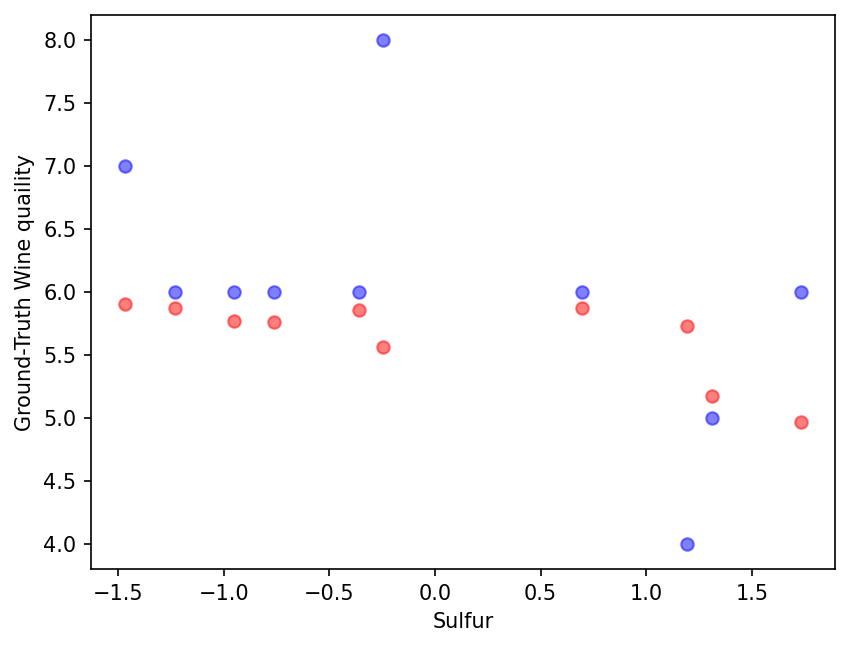

torch.Size([979, 1])

In [41]:
# sulfur에 대한 점수를 정답값에 대해서는 파란색, 예측값에 대해서는 빨간색으로 표현하여, 결과를 가시화한다.
from matplotlib import pyplot as plt 

fig = plt.figure(dpi=150)

plt.xlabel("Sulfur")
plt.ylabel("Ground-Truth Wine quaility")
plt.plot(sorted_sulfur.detach().numpy(), sorted_truth.detach().numpy(), 'o', alpha=0.5, color='blue')
plt.plot(sorted_sulfur.detach().numpy(), sorted_predicted.detach().numpy(), 'o', alpha=0.5, color='red')
plt.show()
wine_model(val_data).size()

* (a) 온도 데이터와 와인 데이터에 대해 똑같이 epoch을 3,000으로 설정하였을 때, 온도 데이터는 약 1.3460초, 와인 데이터에 대해서는 약 4.3155초가 걸려 와인 데이터에 대한 학습이 약 3초 더 걸린 걸 알 수 있다.
* (b) 훈련 시간에 영향을 주는 요소들은 많이 있다. 온도 데이터와 와인 데이터만 두고 봤을 때에는 우선, 데이터의 양이 학습 시간에 직접적으로 영향을 미칠 것이며 두 개의 데이터가 동일한 양 혹은 소량의 차이를 가지고 있다면, 데이터의 분포도 훈련 시간에 많은 영향을 미친다. 또한, 온도 데이터를 학습 시킬 때에는 단순하게 2차 함수로 모델을 설정하고 학습을 진행하였고, 와인 데이터는 Pytorch의 Neural Network 모듈을 활용하여 모델을 정의하였다. 2차 함수보다는 모듈을 활용한 모델이 더욱 복잡하기 때문에 모델의 복잡도도 학습 시간에 많은 영향을 미쳤을 것이다. 이 외에도 학습률이나 옵티마이저와 같은 하이퍼 파라미터도 영향을 미칠 수 있지만, 본 과제에서는 하이퍼 파라미터를 동일하게 설정하였기 때문에 모델의 복잡도, 데이터셋의 크기가 가장 직접적인 요인이라고 생각된다.
* (c) 손실은 검증 데이터셋을 기준으로 첫 Epoch에서 35.74으로 매우 높았지만, 학습이 끝날 때에는 0.81로 낮아진 걸 볼 수 있다.
* (d) 그래프는 위와 같이 시각화 하였으며, Sulfur의 값은 z-score normalization을 했기 때문에 값이 변경된 것으로 보인다. 하지만, 데이터에 따른 예측값과 정답 간의 경향을 파악하는 데이는 문제가 없다. 또한, 오름차순으로 정렬한 이유는 4장에서 sulfur의 값이 높을수록 wine의 품질 점수가 낮은 경향이 있어, 데이터를 랜덤하게 뽑았을 때에도 그런 경향이 있는지 파악하기 위해서였다. 시각화를 위해 적은 수의 데이터를 뽑아 sulfur의 농도와 품질의 관계는 잘 볼 수 없었다. 결과를 보면 정답과 오차 간의  오차가 다소 있는 것으로 보인다. 학습을 진행할 때 Error가 과적합을 띄지 않은 것으로 보아 모델의 복잡도를 올리거나 Epoch을 늘리는 방향으로 학습 결과를 개선시킬 수 있다.